In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc

In [2]:
db = pd.read_csv('creditcard.csv')

In [3]:
db.head()

,0,-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,...,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62,0.1
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [4]:
db.isnull().sum()

0               0
-1.359807134    0
-0.072781173    0
2.536346738     0
1.378155224     0
-0.33832077     0
0.462387778     0
0.239598554     0
0.098697901     0
0.36378697      0
0.090794172     0
-0.551599533    0
-0.617800856    0
-0.991389847    0
-0.311169354    0
1.468176972     0
-0.470400525    0
0.207971242     0
0.02579058      0
0.40399296      0
0.251412098     0
-0.018306778    0
0.277837576     0
-0.11047391     0
0.066928075     0
0.128539358     0
-0.189114844    0
0.133558377     0
-0.021053053    0
149.62          0
0.1             0
dtype: int64

In [5]:
db.shape

(662, 31)

In [6]:
db.columns

Index(['0', '-1.359807134', '-0.072781173', '2.536346738', '1.378155224',
       '-0.33832077', '0.462387778', '0.239598554', '0.098697901',
       '0.36378697', '0.090794172', '-0.551599533', '-0.617800856',
       '-0.991389847', '-0.311169354', '1.468176972', '-0.470400525',
       '0.207971242', '0.02579058', '0.40399296', '0.251412098',
       '-0.018306778', '0.277837576', '-0.11047391', '0.066928075',
       '0.128539358', '-0.189114844', '0.133558377', '-0.021053053', '149.62',
       '0.1'],
      dtype='object')

In [7]:
db.rename(columns={'0':'Time', '-1.359807134':'V1', '-0.072781173':'V2', '2.536346738':'V3', '1.378155224':'V4',
       '-0.33832077':'V5', '0.462387778':'V6', '0.239598554':'V7', '0.098697901':'V8',
       '0.36378697':'V9', '0.090794172':'V10', '-0.551599533':'V11', '-0.617800856':'V12',
       '-0.991389847':'V13', '-0.311169354':'V14', '1.468176972':'V15', '-0.470400525':'V16',
       '0.207971242':'V17', '0.02579058':'V18', '0.40399296':'V19', '0.251412098':'V20',
       '-0.018306778':'V21', '0.277837576':'V22', '-0.11047391':'V23', '0.066928075':'V24',
       '0.128539358':'V25', '-0.189114844':'V26', '0.133558377':'V27', '-0.021053053':'V28', '149.62':'Amount',
       '0.1':'Class'},inplace=True)

In [8]:
db.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


# Exploratory data analysis

In [9]:
db.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,...,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,241.087613,-0.171685,0.203339,0.865507,0.312177,0.005481,0.190657,0.119999,-0.058113,-0.022026,...,0.011604,-0.101897,-0.039030,-0.001231,0.118344,0.024121,0.026115,-0.015513,70.219940,0.039275
std,146.878674,1.318935,1.195939,1.016148,1.268311,1.131878,1.249667,0.861213,0.829037,0.898050,...,0.611495,0.609526,0.369470,0.628766,0.426891,0.468805,0.308407,0.291266,206.580833,0.194395
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,105.250000,-0.898800,-0.174281,0.311406,-0.436612,-0.553732,-0.614206,-0.325427,-0.158631,-0.517332,...,-0.219976,-0.528998,-0.172891,-0.384998,-0.160561,-0.313283,-0.045096,-0.015094,5.975000,0.000000
50%,241.500000,-0.373362,0.280917,0.894895,0.444094,-0.106432,-0.072322,0.116329,0.043828,-0.074044,...,-0.070155,-0.072565,-0.045317,0.093423,0.145592,-0.015632,0.022920,0.023137,17.240000,0.000000
75%,366.000000,1.109776,0.877703,1.505101,1.140394,0.469752,0.491334,0.567795,0.263080,0.415549,...,0.102520,0.312472,0.073996,0.429869,0.440540,0.264540,0.114210,0.088143,57.147500,0.000000
max,499.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


In [10]:
db.Class.value_counts()

0    636
1     26
Name: Class, dtype: int64

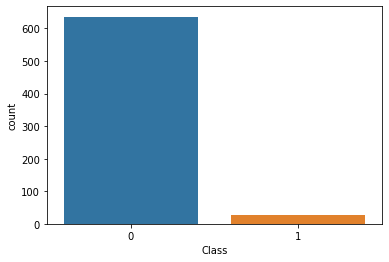

In [11]:
sns.countplot(x = 'Class', data=db)

#### from above fig we can see that the data is imbalanced i.e; class 0 : 636 and class 1 : 26.this problem is overcome by using 'oversampling' technique.

In [12]:
from imblearn.over_sampling import SMOTE
X_new = db.drop('Class',1)
y_new = db.Class
X_new, y_new = SMOTE().fit_sample(X_new, y_new)
unique_elements, counts_elements = np.unique(y_new, return_counts=True)
print(unique_elements, counts_elements)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
sns.countplot(y_new)

### check and remove skewness from dataset by using feature transformation

In [13]:
db.skew()

Time       0.083591
V1        -1.027286
V2        -2.598122
V3        -0.899845
V4        -0.274417
V5         0.610920
V6         1.577533
V7         0.349502
V8        -3.776575
V9         1.120118
V10        3.809279
V11        0.148473
V12       -0.488808
V13       -0.168460
V14       -2.642312
V15       -0.665829
V16       -0.678096
V17       -0.268197
V18        0.008417
V19       -0.003595
V20        4.523975
V21        3.159874
V22       -0.240730
V23       -0.178752
V24       -0.618942
V25       -0.403335
V26        0.900823
V27        0.484349
V28       -3.246353
Amount    10.768448
Class      4.754451
dtype: float64

In [14]:
db.kurtosis()

Time       -1.236082
V1          1.835461
V2         21.133762
V3          3.765736
V4          0.900695
V5          7.122298
V6          2.745670
V7          6.106167
V8         21.506909
V9          5.857867
V10        26.986481
V11        -0.542471
V12         1.025230
V13        -0.395303
V14        11.558977
V15         0.672296
V16         0.985482
V17         8.532145
V18         1.265777
V19         0.827033
V20        47.043560
V21        25.954948
V22         0.563836
V23        29.799581
V24         0.048368
V25         0.234350
V26         2.379221
V27        20.368144
V28        29.302079
Amount    171.534993
Class      20.667236
dtype: float64

Text(0.5, 0, 'cube_root-Amount')

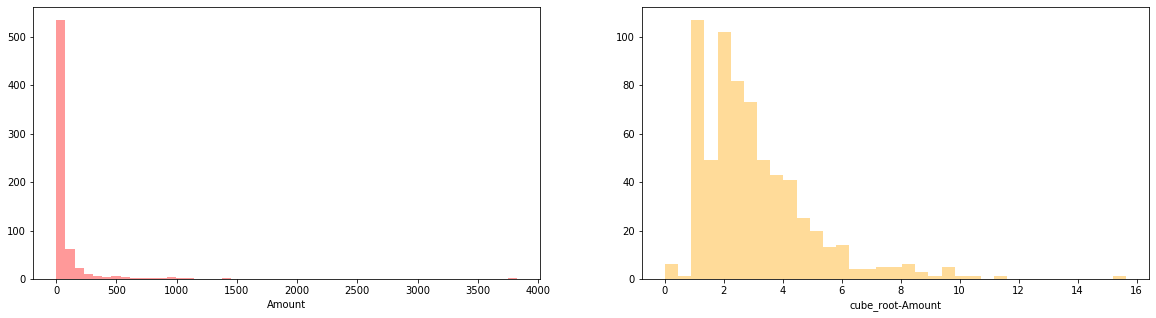

In [15]:
import numpy as np
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.Amount.dropna(), ax=ax[0], kde=False, color="red")
sns.distplot(np.cbrt(db.Amount.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("cube_root-Amount")

Text(0.5, 0, 'cube_root-V21')

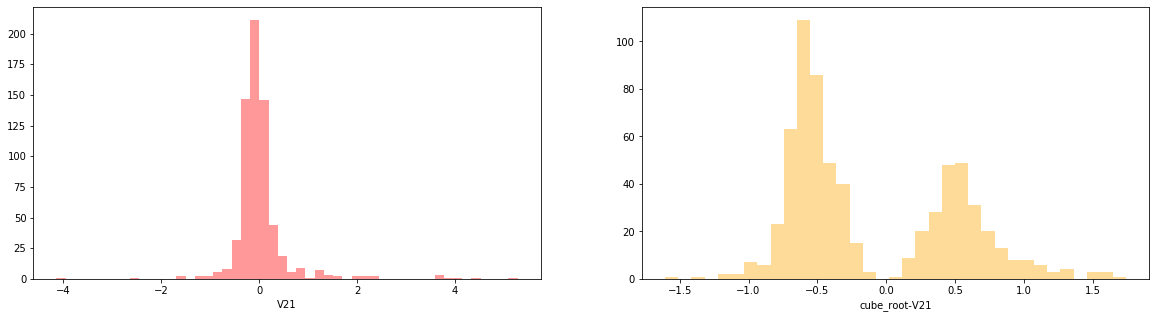

In [16]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.V21.dropna(), ax=ax[0], kde=False, color="red")
sns.distplot(np.cbrt(db.V21.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("cube_root-V21")

In [17]:
print('Skewness: %f' % np.cbrt(db.V21.dropna()).skew())
print('Kurtsis: %f' % np.cbrt(db.V21.dropna()).kurt())

Skewness: 0.623743
Kurtsis: -0.727479


Text(0.5, 0, 'cube_root-V10')

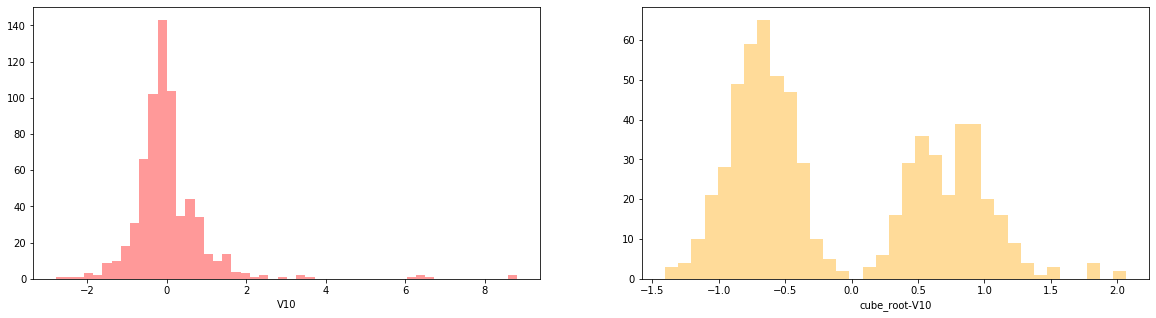

In [18]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.V10.dropna(), ax=ax[0], kde=False, color="red")
sns.distplot(np.cbrt(db.V10.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("cube_root-V10")

In [19]:
print('Skewness: %f' % np.cbrt(db.V10.dropna()).skew())
print('Kurtsis: %f' % np.cbrt(db.V10.dropna()).kurt())

Skewness: 0.407279
Kurtsis: -1.198394


Text(0.5, 0, 'cube_root-V28')

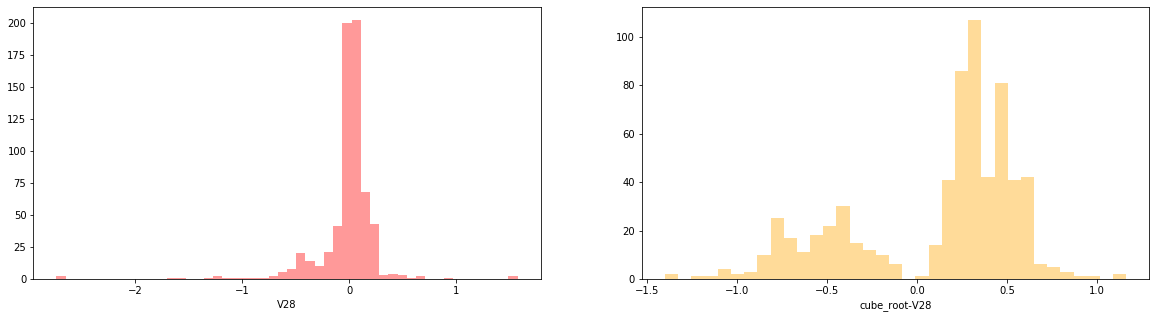

In [20]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.V28.dropna(), ax=ax[0], kde=False, color="red")
sns.distplot(np.cbrt(db.V28.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("cube_root-V28")

In [21]:
print('Skewness: %f' % np.cbrt(db.V28.dropna()).skew())
print('Kurtsis: %f' % np.cbrt(db.V28.dropna()).kurt())

Skewness: -0.923657
Kurtsis: -0.142212


#### StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
db['Amount'] = np.cbrt(db.Amount)
db['scaled_amount'] = sc.fit_transform(db['Amount'].values.reshape(-1,1))
db['scaled_time'] = sc.fit_transform(db['Time'].values.reshape(-1,1))

db.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = db['scaled_amount']
scaled_time = db['scaled_time']

In [23]:
db.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
db.insert(0, 'scaled_amount', scaled_amount)
db.insert(1, 'scaled_time', scaled_time)

In [24]:
db.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.872336,-1.642648,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
1,2.263085,-1.635834,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
2,1.053362,-1.635834,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
3,0.592572,-1.629021,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
4,-0.790926,-1.629021,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0


In [25]:
print('No Frauds', round(db['Class'].value_counts()[0]/len(db) * 100,2), '% of the dataset')
print('Frauds', round(db['Class'].value_counts()[1]/len(db) * 100,2), '% of the dataset')


No Frauds 96.07 % of the dataset
Frauds 3.93 % of the dataset


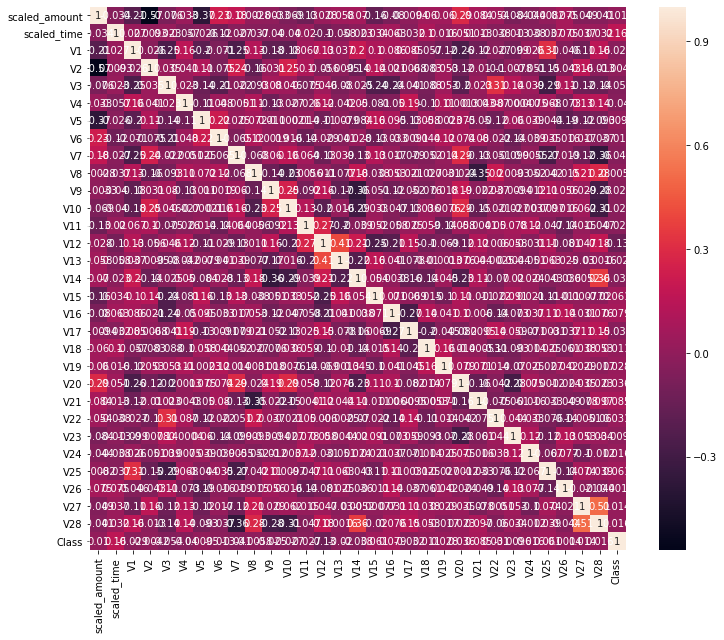

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(db.corr(), annot=True)

In [27]:
db.corr()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
scaled_amount,1.000000,-0.033527,-0.212404,-0.569457,-0.076162,0.032802,-0.373807,0.225698,0.181828,0.002752,...,0.285186,0.084248,0.053800,-0.083836,-0.043715,0.008238,0.075382,-0.048624,-0.040551,0.010091
scaled_time,-0.033527,1.000000,0.026525,0.009282,0.022755,-0.056830,-0.026121,-0.120682,-0.027293,-0.036677,...,0.051396,0.013472,-0.038399,-0.013401,-0.037604,-0.036855,0.074970,0.037111,0.031997,0.162226
V1,-0.212404,0.026525,1.000000,-0.025500,-0.252781,0.158491,-0.199572,-0.070853,-0.251345,0.125183,...,-0.260058,-0.123138,-0.026949,-0.099023,0.026258,0.312670,-0.045698,-0.114315,0.156143,-0.028626
V2,-0.569457,0.009282,-0.025500,1.000000,0.034651,0.040685,0.111191,-0.075451,0.238993,-0.158980,...,-0.117927,-0.009963,-0.101449,-0.007755,-0.051037,-0.150999,-0.043033,0.161945,-0.012913,-0.004196
V3,-0.076162,0.022755,-0.252781,0.034651,1.000000,0.023157,-0.139726,-0.211955,-0.021775,-0.092814,...,-0.198172,0.023016,0.313636,0.141026,0.039179,-0.292592,0.109102,-0.123920,-0.143480,-0.054338
V4,0.032802,-0.056830,0.158491,0.040685,0.023157,1.000000,-0.112968,0.047831,-0.005098,0.107145,...,0.001339,0.004310,0.086550,-0.000402,0.007484,0.068317,-0.073497,0.128756,0.144845,-0.039974
V5,-0.373807,-0.026121,-0.199572,0.111191,-0.139726,-0.112968,1.000000,0.217450,0.024768,0.071964,...,0.075063,-0.049607,-0.123638,0.059801,0.038584,-0.044219,-0.186314,-0.122249,-0.093093,0.009496
V6,0.225698,-0.120682,-0.070853,-0.075451,-0.211955,0.047831,0.217450,1.000000,-0.064613,0.116144,...,0.073535,0.079946,-0.022302,-0.135285,-0.038717,0.035418,-0.016174,0.016608,-0.037247,-0.012635
V7,0.181828,-0.027293,-0.251345,0.238993,-0.021775,-0.005098,0.024768,-0.064613,1.000000,-0.068407,...,0.291804,-0.128520,-0.051432,-0.098927,0.005472,-0.269860,-0.019166,-0.123530,-0.359531,-0.041306
V8,0.002752,-0.036677,0.125183,-0.158980,-0.092814,0.107145,0.071964,0.116144,-0.068407,1.000000,...,-0.024306,-0.345148,0.199389,0.009281,-0.052335,-0.042197,-0.014993,0.205722,0.280837,-0.005821


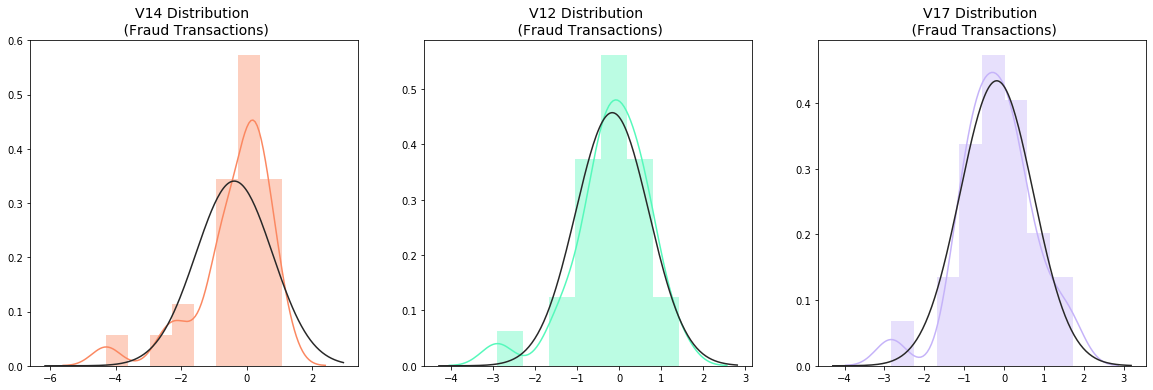

In [28]:
# To improve the accuracy of the model, we can remove those features that are highly
# correlated with the class and are extreme outliers. We can change the threshold 
# to detect the outliers
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = db['V14'].loc[db['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = db['V12'].loc[db['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v17_fraud_dist = db['V17'].loc[db['Class'] == 1].values
sns.distplot(v17_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [29]:
db.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.872336,-1.642648,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
1,2.263085,-1.635834,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
2,1.053362,-1.635834,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
3,0.592572,-1.629021,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
4,-0.790926,-1.629021,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0


In [30]:
X = db.drop('Class',1)
X['V21'] =    np.cbrt(X.V21)
X['V10'] =    np.cbrt(X.V10)
X['V28'] =    np.cbrt(X.V28)
    
y = db.Class

In [37]:
from imblearn.over_sampling import SMOTE
X_new, y_new = SMOTE().fit_sample(X, y)

Using TensorFlow backend.


In [38]:
unique_element, counts_element = np.unique(y_new, return_counts=True)

In [39]:
print(unique_element,counts_element)

[0 1] [636 636]


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size =0.25, random_state = 40)

# Model Preparation

In [41]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

In [42]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_pred = random_forest.predict(X_test)

In [44]:
y_test[:5]

487    0
970    1
410    0
721    1
482    0
Name: Class, dtype: int64

In [45]:
y_pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

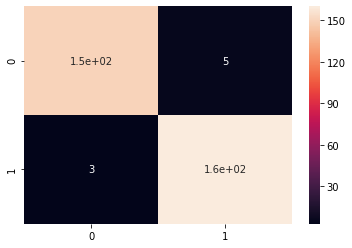

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [197]:
print(cm)

[[150   5]
 [  2 161]]


In [199]:
from sklearn.metrics import classification_report

In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       155
           1       0.97      0.99      0.98       163

   micro avg       0.98      0.98      0.98       318
   macro avg       0.98      0.98      0.98       318
weighted avg       0.98      0.98      0.98       318



In [201]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9777359984167822


Text(0.5,0,'False Positive Rate')

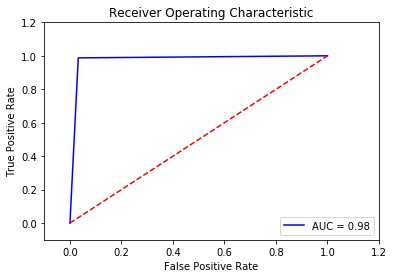

In [202]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [205]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics.classification import accuracy_score
    from sklearn.metrics.classification import confusion_matrix
    #print(model,parameters)
    

    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 10,refit=True,scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, train_y_pred)
    test_conf = confusion_matrix (y_test, y_pred)
    train_conf = confusion_matrix (y_train, train_y_pred)
    
    
    class_report = classification_report(y_test,y_pred)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
     
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_accuracy across ALL models:\n",
          train_acc)
                                    
    print("\n The test_accuracy across ALL models:\n",
          test_acc) 
    print("\n The train_confusion matrix across ALL models:\n",
          train_conf) 
    print("\n The test_confusion matrix across ALL models:\n",
          test_conf) 
    
    print("\n classification report across ALL models:\n",
          class_report) 
    
    print ("\n ROC_Auc of all models ",
                roc_auc)
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.03, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=1000, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.2, tree_method=None,
       validate_parameters=False, verbosity=None)

 The best score across ALL searched params:
 0.9794123366064276

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.2}

 The train_accuracy across ALL models:
 0.9989517819706499

 The test_accuracy

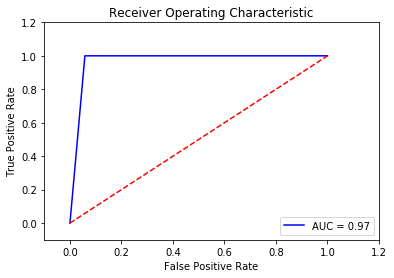

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9804272445972922

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.5}

 The train_accuracy across ALL models:
 1.0

 The test_accuracy across ALL models:
 0.968

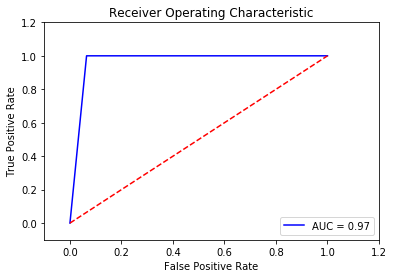

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

 The best score across ALL searched params:
 0.9709707137710342

 The best parameters across ALL searched params:
 {'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 3}

 The train_accuracy across ALL models:
 0.989517819706499

 The test_accuracy across ALL models:
 0.9654088050314465

 The train_confusion matrix across ALL models:
 [[471  10]
 [  0 473]]

 The test_confusion matrix across ALL mo

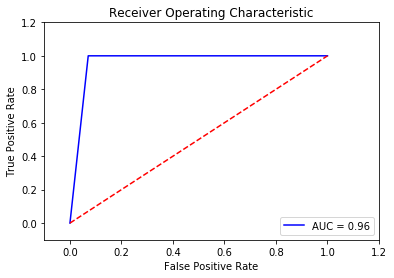

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

 The best score across ALL searched params:
 0.9794220361100415

 The best parameters across ALL searched params:
 {'C': 10, 'kernel': 'rbf'}

 The train_accuracy across ALL models:
 0.9947589098532494

 The test_accuracy across ALL models:
 0.9779874213836478

 The train_confusion matrix across ALL models:
 [[476   5]
 [  0 473]]

 The test_confusion matrix across ALL models:
 [[148   7]
 [  0 163]]

 classification report across ALL models:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       155
           1       0.96      1.00      0.

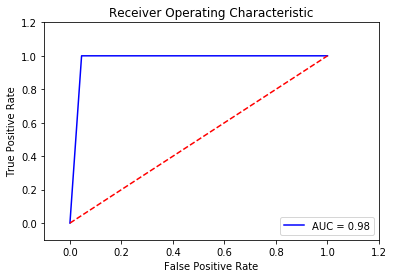

None



In [206]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
alg = [XGBClassifier(),GradientBoostingClassifier(), RandomForestClassifier(),SVC(probability=True)]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              { 'max_depth'    : [4,6,8],
                  'min_samples_split' : [2,3,4],
                  'max_features'    : ['auto','sqrt','log2']},
              
              {'kernel':['linear', 'rbf'], 
                'C':[1, 10]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

we can see that the 'supportvectorClassifier' model has best score and their true positive rate and false positive rate  are better as campare to other models

### bar plot of features importances

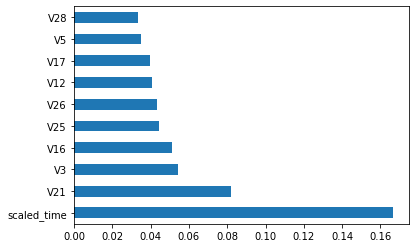

In [47]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(10)
feat_importances.plot(kind='barh')

from this graph we can see that the most important feature for this model is 'scaled_time'.

## save model

In [48]:
import pickle

In [49]:
filename='creditcard_XGBClassifier_model.sav'

In [50]:
pickle.dump(model, open(filename, 'wb'))

In [51]:
load_lr_model =pickle.load(open(filename, 'rb'))